In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # data visualization library  
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV

import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


In [ ]:
# read data
data = pd.read_csv('CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## DATA PREPROCESSING - FEATURE ENGINEERING

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [ ]:
#Count missing variable
data.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
TENURE                                0
PURCHASES_FREQUENCY                   0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
ONEOFF_PURCHASES_FREQUENCY            0
PRC_FULL_PAYMENT                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
PAYMENTS                              0
CUST_ID                               0
dtype: int64

In [ ]:
data.loc[data.isnull().any(axis=1)].head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.0,1499.0,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.0,97.0,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.0,0.0,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.0,0.0,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.9,1283.9,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12


In [ ]:
#Fill  missing variable
data['MINIMUM_PAYMENTS'].fillna(data["PAYMENTS"], inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)

In [ ]:
# Feature Engineering
data["new_BALANCE_BALANCE_FREQUENCY"] = data["BALANCE"] * data["BALANCE_FREQUENCY"]
data["new_ONEOFF_PURCHASES_PURCHASES"] = data["ONEOFF_PURCHASES"] / data["PURCHASES"]
data["new_INSTALLMENTS_PURCHASES_PURCHASES"] = data["INSTALLMENTS_PURCHASES"] / data["PURCHASES"]
data["new_CASH_ADVANCE_PURCHASES_PURCHASES"] = data["CASH_ADVANCE"] * data["CASH_ADVANCE_FREQUENCY"]
data["new_PURCHASES_PURCHASES_FREQUENCY"] = data["PURCHASES"] * data["PURCHASES_FREQUENCY"]
data["new_PURCHASES_ONEOFF_PURCHASES_FREQUENCY"] = data["PURCHASES"] * data["ONEOFF_PURCHASES_FREQUENCY"]
data["new_PURCHASES_PURCHASES_TRX"] = data["PURCHASES"] / data["PURCHASES_TRX"]
data["new_CASH_ADVANCE_CASH_ADVANCE_TRX"] = data["CASH_ADVANCE"] / data["CASH_ADVANCE_TRX"]
data["new_BALANCE_CREDIT_LIMIT"] = data["BALANCE"] / data["CREDIT_LIMIT"]
data["new_PAYMENTS_CREDIT_LIMIT"] = data["PAYMENTS"] / data["MINIMUM_PAYMENTS"]

In [ ]:
#Checking missing variable
data.isnull().sum().sort_values(ascending=False).head()

new_CASH_ADVANCE_CASH_ADVANCE_TRX       4628
new_ONEOFF_PURCHASES_PURCHASES          2044
new_INSTALLMENTS_PURCHASES_PURCHASES    2042
new_PURCHASES_PURCHASES_TRX             2041
new_PAYMENTS_CREDIT_LIMIT                240
dtype: int64

In [ ]:
data.fillna(0, inplace=True)

In [ ]:
#Indexing CUST_ID feature
data.set_index('CUST_ID', inplace=True)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,new_BALANCE_BALANCE_FREQUENCY,new_ONEOFF_PURCHASES_PURCHASES,new_INSTALLMENTS_PURCHASES_PURCHASES,new_CASH_ADVANCE_PURCHASES_PURCHASES,new_PURCHASES_PURCHASES_FREQUENCY,new_PURCHASES_ONEOFF_PURCHASES_FREQUENCY,new_PURCHASES_PURCHASES_TRX,new_CASH_ADVANCE_CASH_ADVANCE_TRX,new_BALANCE_CREDIT_LIMIT,new_PAYMENTS_CREDIT_LIMIT
CUST_ID,,,,,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,33.464257,0.0,1.0,0.000000,15.900032,0.000000,47.700000,0.000000,0.040901,1.446508
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,2911.334306,0.0,0.0,1610.736371,0.000000,0.000000,0.000000,1610.736371,0.457495,3.826241
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,2495.148862,1.0,0.0,0.000000,773.170000,773.170000,64.430833,0.000000,0.332687,0.991682
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,1060.609133,1.0,0.0,17.148933,124.916167,124.916167,1499.000000,205.788017,0.222223,0.000000
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,817.714335,1.0,0.0,0.000000,1.333328,1.333328,16.000000,0.000000,0.681429,2.771075


In [ ]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
for col in data.columns:
    replace_with_thresholds(data, col)

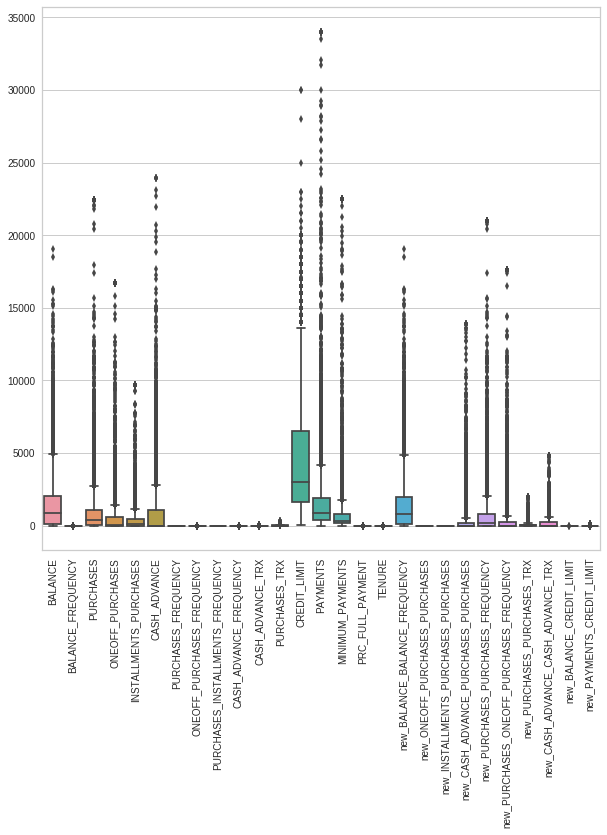

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Min Max Scaler
names = data.columns
indexes = data.index
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(data)
data_scaled = pd.DataFrame(df, columns=names, index=indexes)
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,new_BALANCE_BALANCE_FREQUENCY,new_ONEOFF_PURCHASES_PURCHASES,new_INSTALLMENTS_PURCHASES_PURCHASES,new_CASH_ADVANCE_PURCHASES_PURCHASES,new_PURCHASES_PURCHASES_FREQUENCY,new_PURCHASES_ONEOFF_PURCHASES_FREQUENCY,new_PURCHASES_PURCHASES_TRX,new_CASH_ADVANCE_CASH_ADVANCE_TRX,new_BALANCE_CREDIT_LIMIT,new_PAYMENTS_CREDIT_LIMIT
CUST_ID,,,,,,,,,,,,,,,,,,,,,
C10001,0.002148,0.818182,0.004251,0.000000,0.009819,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.001757,0.000000,0.4,0.000000,0.000759,0.000000,0.024255,0.000000,0.015477,0.011723
C10002,0.168169,0.909091,0.000000,0.000000,0.000000,0.268787,0.000000,0.000000,0.000000,0.166667,...,0.152881,0.000000,0.0,0.115958,0.000000,0.000000,0.000000,0.337471,0.173123,0.031008
C10003,0.131026,1.000000,0.034450,0.046229,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.131026,0.554418,0.0,0.000000,0.036899,0.043891,0.032763,0.000000,0.125893,0.008037
C10004,0.087521,0.636364,0.066791,0.089628,0.000000,0.008585,0.083333,0.083333,0.000000,0.055555,...,0.055695,0.554418,0.0,0.001235,0.005961,0.007091,0.762236,0.043115,0.084092,0.000000
C10005,0.042940,1.000000,0.000713,0.000957,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.042940,0.554418,0.0,0.000000,0.000064,0.000076,0.008136,0.000000,0.257863,0.022457


## KMEANS CLUSTERING

## HIERARCHICAL CLUSTERING

## PRINCIPAL COMPONENT ANALYSIS

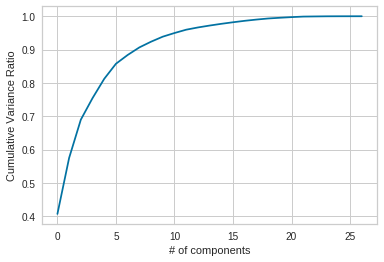

In [ ]:
pca = PCA().fit(data_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.show()

In [ ]:
pca = PCA(n_components=6)
pca_fit = pca.fit_transform(data_scaled)
pca.explained_variance_ratio_

array([0.40676424, 0.168058  , 0.11480499, 0.06466019, 0.05794883,
       0.04519147])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.40676424, 0.57482224, 0.68962724, 0.75428743, 0.81223626,
       0.85742773])

## FEATURE SELECTION

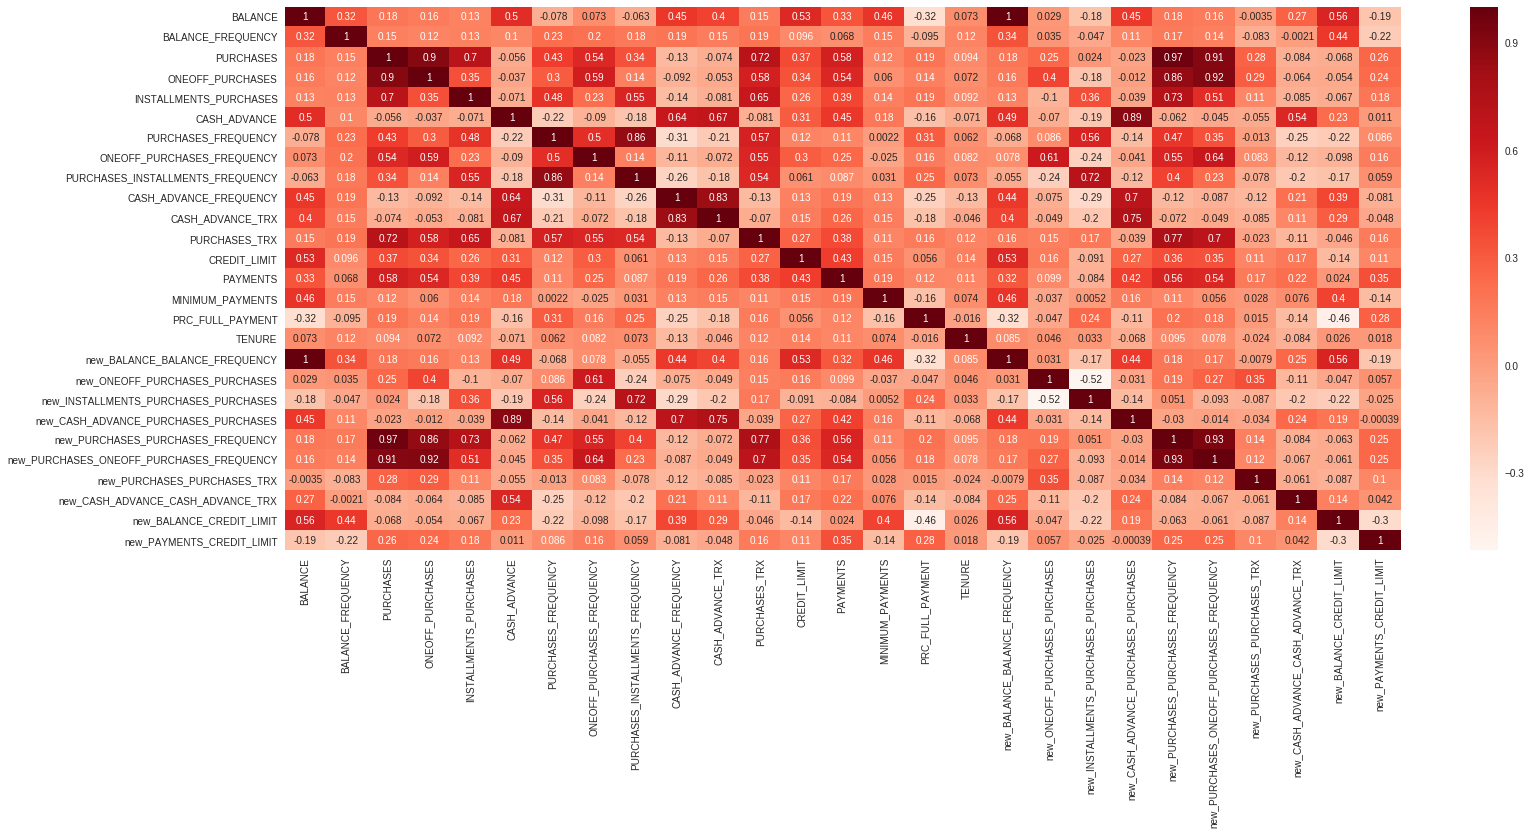

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(25,10))
cor = data_scaled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with BALANCE variable
cor_target = abs(cor["BALANCE"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

BALANCE                          1.000000
CASH_ADVANCE                     0.504225
CREDIT_LIMIT                     0.531296
new_BALANCE_BALANCE_FREQUENCY    0.998279
new_BALANCE_CREDIT_LIMIT         0.555446
Name: BALANCE, dtype: float64

In [ ]:
# Model Random Forest Regression
X = data_scaled.drop(["BALANCE","new_BALANCE_BALANCE_FREQUENCY", "new_BALANCE_CREDIT_LIMIT", "BALANCE_FREQUENCY"],1)   #Feature Matrix
y = data_scaled["BALANCE"]          #Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

rf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)
y_pred = rf_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

0.013067102050280935

In [ ]:
# Model Tuning
rf_params = {"max_depth": [5, 8, None],
             "max_features": [3, 5, 15],
             "n_estimators": [200, 500],
             "min_samples_split": [2, 5, 8]}

rf_model = RandomForestRegressor(random_state=42)
rf_cv_model = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=1).fit(X_train, y_train)
rf_cv_model.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  8.8min finished


{'max_depth': None,
 'max_features': 15,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
rf_tuned = RandomForestRegressor(**rf_cv_model.best_params_).fit(X_train, y_train)

y_pred = rf_tuned.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

0.010690481781987908

## Random Forest Feature Importances

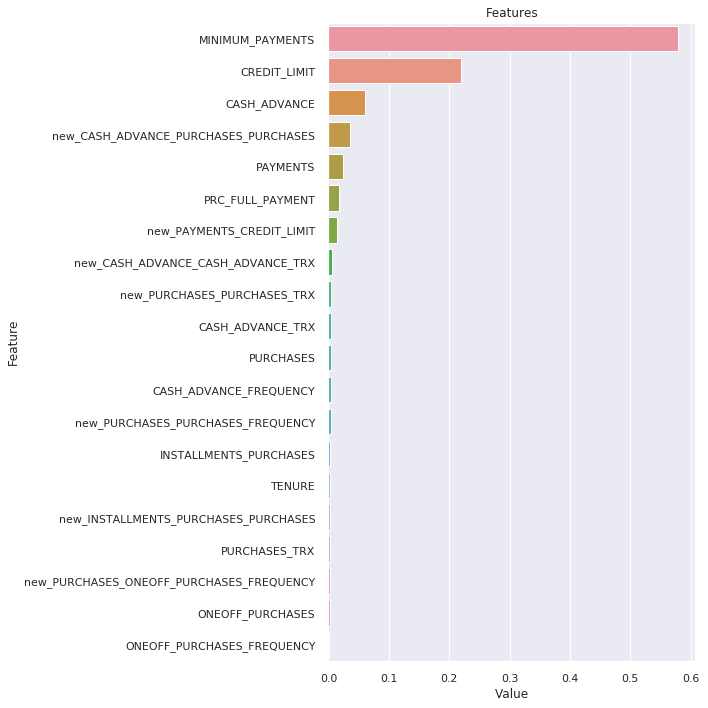

In [ ]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(rf_tuned, X, 20)

## Lasso CV Feature Importances

In [ ]:
X = data_scaled.drop(["BALANCE","new_BALANCE_BALANCE_FREQUENCY", "new_BALANCE_CREDIT_LIMIT", "BALANCE_FREQUENCY"],1)   #Feature Matrix
y = data_scaled["BALANCE"]          #Target Variable

reg = LassoCV()
reg.fit(X, y)

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [ ]:
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000014
Best score using built-in LassoCV: 0.638861


In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")

Lasso picked 21 variables and eliminated the other 2 variables


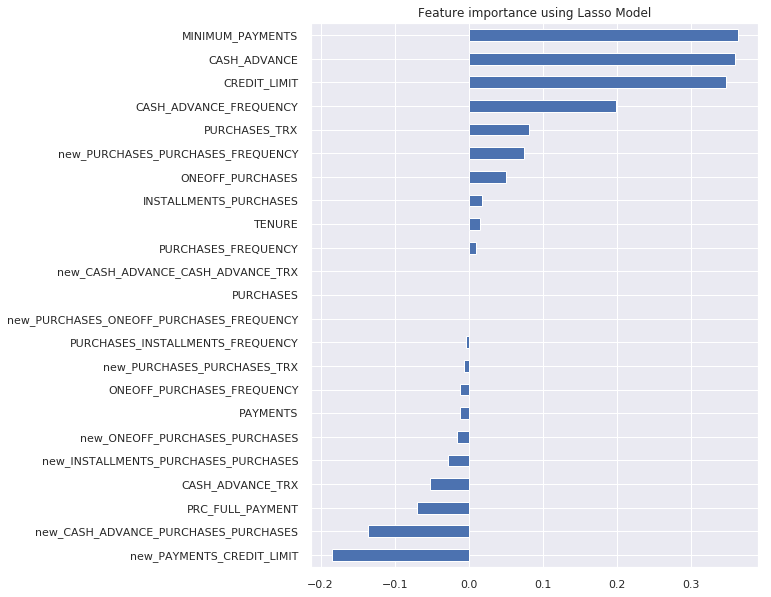

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.show()